In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import win32com.client
import sqlite3

import sys
from enum import Enum
import time
import pythoncom

import warnings
warnings.filterwarnings('ignore')

# matplotlib 그래프 한글지원
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False
if platform.system()== 'Windows':
    path= 'c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties(fname=path).get_name()
    rc('font', family= font_name)
elif platform.system()=='Darwin':
    rc('font', family= 'AppleGothic')
else:
    print('포트를 지원하지 않습니다.')

In [2]:
# 코스닥 종목코드
kosdaq_df= None
with sqlite3.connect('./data/StockData3.sqlite') as conn:
    #kospi_df= pd.read_sql("SELECT * From '코스피_종목코드'", con=conn) # if_exists='append'
    kosdaq_df= pd.read_sql("SELECT * From '코스닥_종목코드'", con=conn) # if_exists='append'    
#print(kospi_df.shape)
print(kosdaq_df.shape)
#(1315, 9)

(1315, 9)


In [3]:
def sqlDataReader(code, 시작일자='20060101', 종료일자='20191201'):
    query= """
        SELECT 날짜, 시가, 고가, 저가, 종가, 거래량 FROM '코스닥_일별주가' WHERE 종목코드='%s' AND 날짜 BETWEEN '%s' AND '%s'
        ORDER BY 날짜 ASC
       """ %(code, 시작일자, 종료일자)
    # 코스피전체종목->일별주가
    # query= """
    #         SELECT 종목코드, 날짜, 시가, 고가, 저가, 종가, 거래량 FROM '코스피 일별주가' WHERE 날짜 BETWEEN '%s' AND '%s'
    #         ORDER BY 날짜 ASC
    #        """ %(시작일자, 종료일자)

    conn= sqlite3.connect('./data/StockData3.sqlite')
    df_local= pd.read_sql_query(query, con= conn)
    conn.close()
    
    df_local.columns= ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    df_local['Date1']= pd.to_datetime(df_local['Date'].values)
    df_local.set_index('Date1', inplace= True)
    df_local.dropna(inplace= True)
    print(df_local.shape)
    
    return df_local

In [4]:
# df Function
def volume_moving_average(df, n): # 거래량 이동평균
    MA = pd.Series(df['Volume'].rolling(n, min_periods=n).mean(), name='VMA_' + str(n))
    df = df.join(MA)
    return df

def close_moving_average(df, n): # 종가 이동평균
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='SMA_' + str(n))
    df = df.join(MA)
    return df

def rate_of_change_VMA20(df, n): # VMA20 변화율
    M = df['VMA_20'].diff(n - 1)
    N = df['VMA_20'].shift(n - 1)
    ROC = pd.Series(M / N, name='ROC_VMA_20_' + str(n))
    df = df.join(ROC)
    return df

def rate_of_change_Close(df, n): # 종가 변화율

    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M / N, name='ROC_' + str(n))
    df = df.join(ROC)
    return df

In [5]:
company_dict= {}
for i in range(len(kosdaq_df)):
    company_dict[kosdaq_df['종목명'][i]] = kosdaq_df['종목코드'][i]
    
print(len(company_dict))
print(len(kosdaq_df))

1315
1315


In [7]:
df_zip = {}
cnt= 0

for name, code in company_dict.items():
    
    df= sqlDataReader(code)
    
    # 거래량 이동평균
    df = volume_moving_average(df, 5)
    df = volume_moving_average(df, 20)
    df = volume_moving_average(df, 60)
    df = volume_moving_average(df, 120)
    # 거래량 이동평균 변화율
    df = rate_of_change_VMA20(df, 2)
    # 종가 이동평균
#     df = close_moving_average(df, 2)
#     df = close_moving_average(df, 5)
#     df = close_moving_average(df, 10)
#     df = close_moving_average(df, 20)
#     df = close_moving_average(df, 60)
#     df = close_moving_average(df, 120)
#     df['Disp5'] = (df['Close'] - df['SMA_5']) / df['SMA_5'] * 100
#     df['Disp10'] = (df['Close'] - df['SMA_10']) / df['SMA_10'] * 100
#     df['Disp20'] = (df['Close'] - df['SMA_20']) / df['SMA_20'] * 100
#     df['Disp60'] = (df['Close'] - df['SMA_60']) / df['SMA_60'] * 100
#     df['Disp120'] = (df['Close'] - df['SMA_120']) / df['SMA_120'] * 100
#     df = rate_of_change_Close(df, 2)
#     df = rate_of_change_Close(df, 3)
#     df = rate_of_change_Close(df, 5)
#     df = rate_of_change_Close(df, 8)
#     df = rate_of_change_Close(df, 13)
#     df = rate_of_change_Close(df, 21)
#     df = rate_of_change_Close(df, 34)
#     df = rate_of_change_Close(df, 55)
#     df = rate_of_change_Close(df, 69)
    df['decre_VMA_20'] = df["VMA_20"].diff().lt(0).values * 1
    df = df.dropna()
    #print(df.head())
    df_zip[name] = df

#     if cnt == 20:
#         break
#     cnt+=1


(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(533, 6)
(2558, 6)
(2558, 6)
(451, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(1169, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(299, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(348, 6)
(2558, 6)
(2558, 6)
(1844, 6)
(2558, 6)
(2558, 6)
(2020, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2470, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(824, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(227, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558, 6)
(2558,

KeyboardInterrupt: 

In [ ]:
datas_dict = {}
for name, df in df_zip.items():
    df_index_list = df.index.tolist()
    datas = []
    for count, i in enumerate(df.index.tolist()):
        
        # A 60-120-20-5패턴
        if df.loc[i, 'VMA_60'] < df.loc[i, 'VMA_120']:
            continue
        if df.loc[i, 'VMA_120'] < df.loc[i, 'VMA_20']:
            continue
        if df.loc[i, 'VMA_20'] < df.loc[i, 'VMA_5']:
            continue

        # B_algo_P_drop_20
        if 0.7 * df.loc[i,'VMA_60'] < df.loc[i, 'VMA_120']:
            continue

        # C_algo_P_drop_20
        if 0.5 * df.loc[i, 'VMA_120'] < df.loc[i, 'VMA_5']:
            continue
        #
        # D_algo_P_drop_20
        if count > 10:
            if df.loc[df_index_list[count-10]:df_index_list[count], 'decre_VMA_20'].sum() >= 9:
                continue
        #
        # E_algo_P_drop_20
        value = None
        if count > 17:
            for k in range(7, 17):
                if df.loc[df_index_list[count-k], 'VMA_20'] > 2 * df.loc[df_index_list[count-k], 'VMA_60']:
                    value = 1
        if value == 1:
            continue
        datas.append(count)
    datas_dict[name] = datas

print(datas_dict)

In [57]:
# 해당종목에 대한 검색시점을 index가 아닌 날짜로 변환
datas_dict2= {}
for name in datas_dict.keys():    
    dates_list= []
    if len(datas_dict[name]) > 0:
        for idx in datas_dict[name]:
            dates_list.append(df_zip[name].index[idx])
        datas_dict2[name]= dates_list
        
# datas_dict2저장
# https://dojang.io/mod/page/view.php?id=2327
import pickle

with open('dic.p', 'wb') as f:
    pickle.dump(datas_dict2,f)



In [33]:
datas_dict2['삼천당제약'][0]
df_zip['삼천당제약'].loc[datas_dict2['삼천당제약'][0]]

Timestamp('2012-10-04 00:00:00')

In [6]:
import pickle

with open('dic.p', 'rb') as f:
    datas_dict4= pickle.load(f)


In [175]:
df= None
code= company_dict['중앙에너비스']
df= sqlDataReader(code)
df.head()


(2552, 6)


,Date,Open,High,Low,Close,Volume
Date1,,,,,,
2009-01-02,20090102,2265,2480,2250,2355,3530.0
2009-01-05,20090105,2325,2360,2275,2290,550.0
2009-01-06,20090106,2290,2345,2205,2250,6020.0
2009-01-07,20090107,2335,2475,2245,2330,29270.0
2009-01-08,20090108,2340,2475,2210,2320,2080.0


In [176]:
df['MA5']= df['Close'].rolling(window= 5).mean()
df['MA10']= df['Close'].rolling(window= 10).mean()
df['MA20']= df['Close'].rolling(window= 20).mean()
df['MA60']= df['Close'].rolling(window= 60).mean()
df['MA120']= df['Close'].rolling(window= 120).mean()

df['VMA5']= df['Volume'].rolling(window= 5).mean()
df['VMA20']= df['Volume'].rolling(window= 20).mean()
df['VMA60']= df['Volume'].rolling(window= 60).mean()
df['VMA120']= df['Volume'].rolling(window= 120).mean()

In [80]:
def get_bool(s):
    if s > 0:
        return 1
    elif s <= 0:
        return 0

for i in [5,10,20,60,120]:
    df['UP'+str(i)]= ((df['MA'+str(i)] - df['MA'+str(i)].shift(1)).apply(get_bool)) #1

for i in [5,20,60,120]:
    df['VUP'+str(i)]= ((df['VMA'+str(i)] - df['VMA'+str(i)].shift(1)).apply(get_bool)) #2

df['ON5_10']= ((df['MA5'] - df['MA10']).apply(get_bool)) #3
df['ON5_20']= ((df['MA5'] - df['MA20']).apply(get_bool)) #3
df['ON5_60']= ((df['MA5'] - df['MA60']).apply(get_bool)) #3
df['ON5_120']= ((df['MA5'] - df['MA120']).apply(get_bool)) #3
df['ON10_20']= ((df['MA10'] - df['MA20']).apply(get_bool)) #3
df['ON10_60']= ((df['MA10'] - df['MA60']).apply(get_bool)) #3
df['ON10_120']= ((df['MA10'] - df['MA120']).apply(get_bool)) #3
df['ON20_60']= ((df['MA20'] - df['MA60']).apply(get_bool)) #3
df['ON20_120']= ((df['MA20'] - df['MA120']).apply(get_bool)) #3
df['ON60_120']= ((df['MA60'] - df['MA120']).apply(get_bool)) #3

for i in [5,10,20,60,120]:
    df['ONC'+str(i)]= ((df['Close'] - df['MA'+str(i)]).apply(get_bool)) #4

for i in [5,20,60,120]:
    df['ONV'+str(i)]= ((df['Volume'] - df['VMA'+str(i)]).apply(get_bool)) #5

for i in [5,10,20,60,120]:
    df['Disp'+str(i)]= (df['Close'] - df['MA'+str(i)]) / df['MA'+str(i)] * 100 #6

for i in [5,10,20,60,120]:
    df['Grad'+str(i)]= (df['MA'+str(i)] - df['MA'+str(i)].shift(1)) / df['MA'+str(i)] * 100 #7

for i in [1,2,4,7]:
    df['RC'+ str(i)]= (df['Close'] - df['Close'].shift(i)) / df['Close'] * 100 #8


In [83]:
print(df.shape)
df.columns

(2552, 57)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'MA20',
       'MA60', 'MA120', 'VMA5', 'VMA20', 'VMA60', 'VMA120', 'UP5', 'UP10',
       'UP20', 'UP60', 'UP120', 'VUP5', 'VUP20', 'VUP60', 'VUP120', 'ON5_10',
       'ON5_20', 'ON5_60', 'ON5_120', 'ON10_20', 'ON10_60', 'ON10_120',
       'ON20_60', 'ON20_120', 'ON60_120', 'ONC5', 'ONC10', 'ONC20', 'ONC60',
       'ONC120', 'ONV5', 'ONV20', 'ONV60', 'ONV120', 'Disp5', 'Disp10',
       'Disp20', 'Disp60', 'Disp120', 'Grad5', 'Grad10', 'Grad20', 'Grad60',
       'Grad120', 'RC1', 'RC2', 'RC4', 'RC7'],
      dtype='object')

In [178]:
df['Target1'] = (df['Close'].shift(-1) - df['Close']) / df['Close'] * 100
df['Target'] = (df['Close'].shift(-1) - df['Close']) / df['Close'] * 100

for i in range(1,15):
    df['Target'] = df['Target1'].shift(-1*i) * (0.85**i) + df['Target']    
    
del df['Target1']


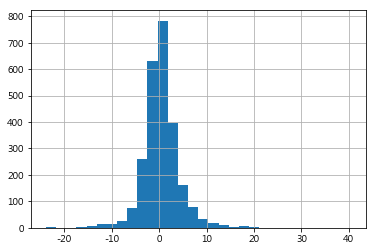

In [179]:
df.Target.hist(bins=30)

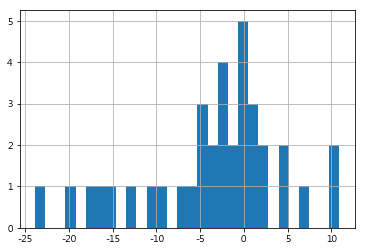

In [180]:
df.loc[datas_dict4['중앙에너비스']].Target.hist(bins=30)

In [193]:
df.loc[datas_dict4['중앙에너비스']].Target

Date1
2010-06-09    -6.824609
2010-06-10    -4.317612
2010-06-11    -4.898269
2010-06-14    -5.019122
2010-06-15    -6.208640
2010-06-16    -2.267154
2010-06-17    -1.314881
2010-06-18    -0.931713
2010-06-21     0.091914
2010-10-22     0.510787
2010-10-25     2.070854
2013-05-15    -2.739483
2013-05-16    -3.301371
2013-05-20    -3.699507
2013-05-21    -2.106719
2013-05-22    -2.452672
2013-05-23    -0.366004
2013-11-19     0.241804
2013-11-20    -0.044515
2013-11-21     1.455926
2013-11-22    -0.572015
2015-04-29     1.401881
2015-04-30     2.140887
2015-05-04     4.871974
2015-05-06     4.348939
2015-05-07     6.972022
2015-05-08    10.919802
2015-05-11    10.020651
2018-11-26    -8.890180
2018-11-27   -10.648496
2018-11-28   -12.642185
2018-11-29   -16.287428
2018-11-30   -14.711467
2018-12-03   -17.414184
2018-12-04   -20.271890
2018-12-05   -23.864351
Name: Target, dtype: float64

In [ ]:
# 코드,종목,날짜,종가,기술지표(47),목표값(1)
# 전체종목에 대해 csv로 저장

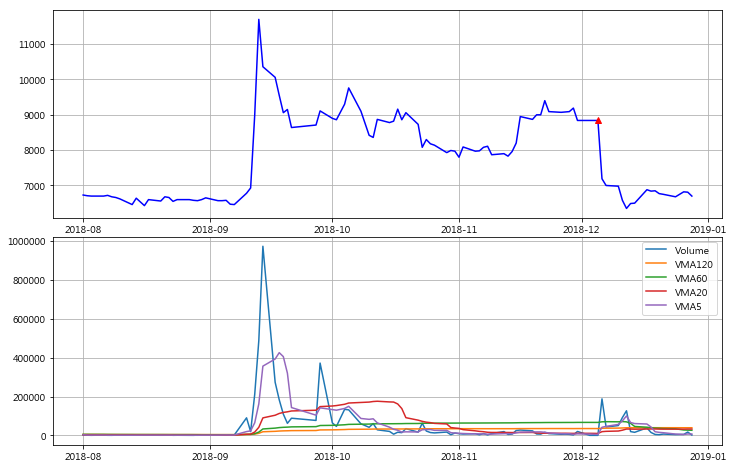

In [191]:
# 반례, '중앙에너비스'

name= '중앙에너비스'
last_day= datas_dict4[name][-1]
df_graph= df.loc['2018-08-01':'2019-01-01'].copy()
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10), sharex=True)
fig= plt.figure(figsize=(12,8))
ax1= plt.subplot2grid((4,4),(0,0), rowspan=2, colspan=4)
ax2= plt.subplot2grid((4,4),(2,0), rowspan=2, colspan=4)

ax1.plot(df_graph.index, df_graph['Close'], color='b')
ax1.plot(last_day, df_graph.loc[last_day]['Close'], '^', color='r')
ax2.plot(df_graph.index, df_graph['Volume'])
ax2.plot(df_graph.index, df_graph['VMA120'])
ax2.plot(df_graph.index, df_graph['VMA60'])
ax2.plot(df_graph.index, df_graph['VMA20'])
ax2.plot(df_graph.index, df_graph['VMA5'])
ax1.grid()
ax2.grid()
ax2.legend(loc='best')
plt.show()

In [129]:
import pickle

with open('dic.p', 'rb') as f:
    datas_dict4= pickle.load(f)


def get_bool(s):
    if s > 0:
        return 1
    elif s <= 0:
        return 0

df0= None
df= None    
    
for name in datas_dict4.keys():
    
    code= company_dict[name]
    df= sqlDataReader(code)

    df['MA5']= df['Close'].rolling(window= 5).mean()
    df['MA10']= df['Close'].rolling(window= 10).mean()
    df['MA20']= df['Close'].rolling(window= 20).mean()
    df['MA60']= df['Close'].rolling(window= 60).mean()
    df['MA120']= df['Close'].rolling(window= 120).mean()

    df['VMA5']= df['Volume'].rolling(window= 5).mean()
    df['VMA20']= df['Volume'].rolling(window= 20).mean()
    df['VMA60']= df['Volume'].rolling(window= 60).mean()
    df['VMA120']= df['Volume'].rolling(window= 120).mean()

    for i in [5,10,20,60,120]:
        df['UP'+str(i)]= ((df['MA'+str(i)] - df['MA'+str(i)].shift(1)).apply(get_bool)) #1

    for i in [5,20,60,120]:
        df['VUP'+str(i)]= ((df['VMA'+str(i)] - df['VMA'+str(i)].shift(1)).apply(get_bool)) #2

    df['ON5_10']= ((df['MA5'] - df['MA10']).apply(get_bool)) #3
    df['ON5_20']= ((df['MA5'] - df['MA20']).apply(get_bool)) #3
    df['ON5_60']= ((df['MA5'] - df['MA60']).apply(get_bool)) #3
    df['ON5_120']= ((df['MA5'] - df['MA120']).apply(get_bool)) #3
    df['ON10_20']= ((df['MA10'] - df['MA20']).apply(get_bool)) #3
    df['ON10_60']= ((df['MA10'] - df['MA60']).apply(get_bool)) #3
    df['ON10_120']= ((df['MA10'] - df['MA120']).apply(get_bool)) #3
    df['ON20_60']= ((df['MA20'] - df['MA60']).apply(get_bool)) #3
    df['ON20_120']= ((df['MA20'] - df['MA120']).apply(get_bool)) #3
    df['ON60_120']= ((df['MA60'] - df['MA120']).apply(get_bool)) #3

    for i in [5,10,20,60,120]:
        df['ONC'+str(i)]= ((df['Close'] - df['MA'+str(i)]).apply(get_bool)) #4

    for i in [5,20,60,120]:
        df['ONV'+str(i)]= ((df['Volume'] - df['VMA'+str(i)]).apply(get_bool)) #5

    for i in [5,10,20,60,120]:
        df['Disp'+str(i)]= (df['Close'] - df['MA'+str(i)]) / df['MA'+str(i)] * 100 #6

    for i in [5,10,20,60,120]:
        df['Grad'+str(i)]= (df['MA'+str(i)] - df['MA'+str(i)].shift(1)) / df['MA'+str(i)] * 100 #7

    for i in [1,2,4,7,12,20,33,54,68]:
        df['RC'+ str(i)]= (df['Close'] - df['Close'].shift(i)) / df['Close'] * 100 #8

    df['Target1'] = (df['Close'].shift(-1) - df['Close']) / df['Close'] * 100
    df['Target'] = (df['Close'].shift(-1) - df['Close']) / df['Close'] * 100

    for i in range(0,15):
        df['Target'] = df['Target1'].shift(-1*i) * (0.85**i) + df['Target']    

    df = df.loc[datas_dict4[name]]
    del df['Target1']
    df.drop(df.columns[0:15], axis=1, inplace= True)
    df.reset_index(inplace= True)
    df['Code']= code
    df = df[['Code'] + list(df.columns[:-1])]

    df0= pd.concat([df0, df])

df0.reset_index(inplace= True)
df0.drop('index', axis=1, inplace= True)

(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(527, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(1838, 6)
(2552, 6)
(2552, 6)
(2014, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2464, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(818, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(1931, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2552, 6)
(2

(1338, 6)
(465, 6)
(1323, 6)
(1406, 6)
(1363, 6)
(1335, 6)
(574, 6)
(1078, 6)
(681, 6)
(879, 6)
(590, 6)
(1429, 6)
(1160, 6)
(939, 6)
(383, 6)
(1071, 6)
(1332, 6)
(1361, 6)
(1371, 6)
(1311, 6)
(1069, 6)
(1156, 6)
(1220, 6)
(1032, 6)
(1064, 6)
(911, 6)
(846, 6)
(816, 6)
(1098, 6)
(1225, 6)
(1166, 6)
(1152, 6)
(1062, 6)
(573, 6)
(583, 6)
(1089, 6)
(901, 6)
(1204, 6)
(1125, 6)
(1153, 6)
(1063, 6)
(1070, 6)
(1168, 6)
(1123, 6)
(1089, 6)
(1088, 6)
(998, 6)
(1097, 6)
(1081, 6)
(1094, 6)
(1074, 6)
(818, 6)
(1072, 6)
(1069, 6)
(1064, 6)
(1069, 6)
(1062, 6)
(1064, 6)
(842, 6)
(833, 6)
(998, 6)
(1005, 6)
(843, 6)
(987, 6)
(985, 6)
(978, 6)
(969, 6)
(972, 6)
(584, 6)
(975, 6)
(877, 6)
(947, 6)
(949, 6)
(941, 6)
(953, 6)
(829, 6)
(947, 6)
(939, 6)
(877, 6)
(671, 6)
(923, 6)
(948, 6)
(907, 6)
(940, 6)
(920, 6)
(897, 6)
(795, 6)
(894, 6)
(912, 6)
(907, 6)
(817, 6)
(748, 6)
(821, 6)
(877, 6)
(873, 6)
(861, 6)
(730, 6)
(872, 6)
(749, 6)
(679, 6)
(822, 6)
(774, 6)
(816, 6)
(598, 6)
(814, 6)
(607, 6)
(4

In [130]:
df0.shape

(12784, 50)

In [102]:
# cnt=0
# for i in datas_dict4.keys():
#     cnt += len(datas_dict4[i])
    
# 12784

In [122]:
df0[df0['UP120'].isnull()]

,Code,Date1,UP5,UP10,UP20,UP60,UP120,VUP5,VUP20,VUP60,...,Grad5,Grad10,Grad20,Grad60,Grad120,RC1,RC2,RC4,RC7,Target
167,A003100,2009-06-24,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,...,-0.176783,-0.058772,-0.043924,0.584157,NaN,-0.296736,-1.483680,-0.890208,0.000000,-0.207422
265,A005710,2009-06-24,0.0,0.0,0.0,1.0,NaN,1.0,1.0,0.0,...,-0.352665,-0.177218,-0.034320,0.146870,NaN,-0.700701,-3.403403,-3.403403,-2.502503,0.975504
420,A007370,2009-06-24,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,...,-0.375657,-0.277829,-0.036839,0.415561,NaN,-1.153846,-4.038462,-3.461538,-6.346154,9.146563
724,A010170,2009-06-24,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,...,-0.662118,-1.008617,-1.013518,0.279235,NaN,-3.994674,-7.323569,-7.723036,-10.412783,-1.701527
823,A012860,2009-06-24,0.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,...,-0.156128,-0.461538,-0.299121,0.162984,NaN,2.734375,-0.781250,-1.953125,-3.125000,17.093620
1762,A024060,2009-06-24,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,...,-0.770960,-0.457485,-0.039032,0.435707,NaN,0.330033,-4.785479,-6.600660,-6.765677,-4.469698
1952,A024910,2009-06-24,0.0,0.0,1.0,1.0,NaN,1.0,1.0,1.0,...,-1.113212,-0.539550,0.205023,0.437069,NaN,-0.961538,-2.670940,-2.991453,-8.974359,11.846692
2045,A025870,2009-06-24,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,-1.314217,-1.431844,-0.947996,-0.063188,NaN,-1.026694,-3.696099,-6.570842,-12.525667,6.176954
2163,A026180,2009-06-24,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,...,-1.384083,-0.933390,-0.739523,0.306055,NaN,-3.181818,-7.272727,-8.181818,-9.545455,9.746227
2290,A028300,2009-06-24,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,...,-2.821370,-1.937789,-1.354342,0.235408,NaN,-3.202912,-12.010919,-13.612375,-24.804368,10.166323


In [131]:
df0.dropna(inplace= True)

In [132]:
# df0.isnull().sum()

In [133]:
df0.shape

(12519, 50)

In [ ]:
df0.to_csv('./result_df0_190430.csv')

# 신경망 적용

In [8]:
df0= pd.read_csv('./result_df0_190430.csv')
del df0[df0.columns[0]]
df0.shape

(12519, 81)

In [9]:
df0.head(10)

,Code,Date1,Date,Open,High,Low,Close,Volume,MA5,MA10,...,FC7,FC8,FC9,FC10,FC11,FC12,FC13,FC14,FC15,Target2
0,A000250,2012-10-04,20121004,2540,2590,2540,2560,131673.0,2558.0,2577.0,...,10.156250,7.226562,12.890625,5.468750,4.882812,2.539062,4.687500,4.687500,3.515625,3.515625
1,A000250,2012-10-05,20121005,2565,2620,2515,2565,308022.0,2553.0,2575.5,...,7.017544,12.670565,5.263158,4.678363,2.339181,4.483431,4.483431,3.313840,-2.729045,-2.729045
2,A000440,2010-06-09,20100609,3425,3425,3245,3345,2970.0,3348.0,3356.5,...,-8.968610,-9.417040,-10.313901,-7.473842,-8.221226,-8.669656,-10.911809,-10.762332,-13.004484,-13.004484
3,A000440,2010-06-10,20100610,3340,3420,3210,3245,970.0,3325.0,3350.5,...,-6.625578,-7.550077,-4.622496,-5.392912,-5.855162,-8.166410,-8.012327,-10.323575,-8.628659,-8.628659
4,A000440,2010-06-11,20100611,3260,3385,3160,3240,5020.0,3289.0,3342.0,...,-7.407407,-4.475309,-5.246914,-5.709877,-8.024691,-7.870370,-10.185185,-8.487654,-8.487654,-8.487654
5,A000440,2010-06-14,20100614,3245,3300,3210,3220,1400.0,3279.0,3319.0,...,-3.881988,-4.658385,-5.124224,-7.453416,-7.298137,-9.627329,-7.919255,-7.919255,-7.763975,-7.763975
6,A000440,2010-06-15,20100615,3270,3335,3200,3225,690.0,3255.0,3304.5,...,-4.806202,-5.271318,-7.596899,-7.441860,-9.767442,-8.062016,-8.062016,-7.906977,-8.992248,-8.992248
7,A000440,2010-06-16,20100616,3275,3315,3080,3085,4550.0,3203.0,3275.5,...,-0.972447,-3.403566,-3.241491,-5.672609,-3.889789,-3.889789,-3.727715,-4.862237,-5.510535,-5.510535
8,A000440,2010-06-17,20100617,3020,3125,3000,3050,10370.0,3164.0,3244.5,...,-2.295082,-2.131148,-4.590164,-2.786885,-2.786885,-2.622951,-3.770492,-4.426230,-4.262295,-4.262295
9,A000440,2010-06-18,20100618,3020,3055,2985,3045,4960.0,3125.0,3207.0,...,-1.970443,-4.433498,-2.627258,-2.627258,-2.463054,-3.612479,-4.269294,-4.105090,-0.164204,-0.164204


In [43]:
df0.columns

Index(['Code', 'Date1', 'UP5', 'UP10', 'UP20', 'UP60', 'UP120', 'VUP5',
       'VUP20', 'VUP60', 'VUP120', 'ON5_10', 'ON5_20', 'ON5_60', 'ON5_120',
       'ON10_20', 'ON10_60', 'ON10_120', 'ON20_60', 'ON20_120', 'ON60_120',
       'ONC5', 'ONC10', 'ONC20', 'ONC60', 'ONC120', 'ONV5', 'ONV20', 'ONV60',
       'ONV120', 'Disp5', 'Disp10', 'Disp20', 'Disp60', 'Disp120', 'Grad5',
       'Grad10', 'Grad20', 'Grad60', 'Grad120', 'RC1', 'RC2', 'RC4', 'RC7',
       'RC12', 'RC20', 'RC33', 'RC54', 'RC68', 'Target'],
      dtype='object')

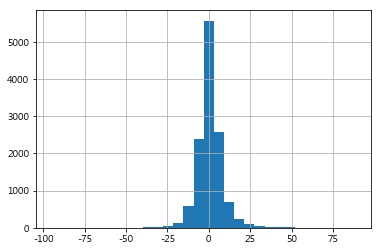

In [4]:
df0[df0.columns[-1]].hist(bins=30)

In [47]:
for col in df0.columns[-20:]:
    
    x= df0[col]
    max_x = x.mean() + 2*x.std()
    min_x = x.mean() - 2*x.std()
    k = (x - min_x) / (max_x - min_x)
    k= k.apply(lambda v:1 if v > 1 else v)
    k= k.apply(lambda v:0 if v < 0 else v)
    df0[col] = k 


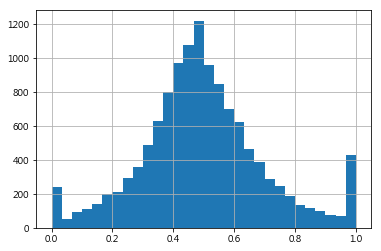

In [48]:
df0[df0.columns[-1]].hist(bins=30)

In [49]:
def f1(x):
    if x > 0.5:
        return 1
    else:
        return 0

df0['Target']= pd.Series(map(f1,df0['Target']))


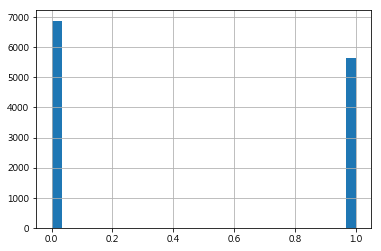

In [50]:
df0['Target'].hist(bins=30)

In [51]:
# 랜덤하게 섞은 다음 train set과 test set을 나눈다.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df0[df0.columns[2:-1]], df0[df0.columns[-1:]], test_size=0.2, shuffle= True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10015, 47)
(10015, 1)
(2504, 47)
(2504, 1)


In [52]:
y_train.head()

,Target
6574,1
422,1
7508,1
3231,1
2416,0


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
print('훈련 세트 정확도: {:.3f}'.format(rf.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(rf.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.611


In [34]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

#rf= LinearRegression()

rf=svm.SVC(kernel='rbf',C=0.1,gamma=0.1)


# rf= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10,
#                                    loss='huber', random_state =18)

rf.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
print('훈련 세트 정확도: {:.3f}'.format(rf.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(rf.score(X_test, y_test)))

훈련 세트 정확도: 0.553
테스트 세트 정확도: 0.557


In [102]:
import keras
from keras import layers, models
import random as rd
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from sklearn.metrics import accuracy_score
from keras import optimizers
from keras import regularizers

#np.random.seed(5)

keras.backend.clear_session()
model = keras.models.Sequential()

model.add( layers.Dense(60, input_shape=(X_train.shape[1],), activation='relu' ))
model.add( layers.Dropout(0.5))
model.add( layers.Dense(40, activation='relu' ))
model.add( layers.Dropout(0.5))
model.add( layers.Dense(40, activation='relu' ))
model.add( layers.Dense(20, activation='relu' ))
model.add( layers.Dense(1, activation='sigmoid'))

# model.compile(loss = 'mse', optimizer = 'adam', metrics =['mae']) 

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                2880      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2440      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total para

In [103]:
# 데이터 학습
history = model.fit(X_train, y_train, epochs= 500, batch_size = 2000, verbose=1, validation_data=(X_test, y_test) )

Train on 10015 samples, validate on 2504 samples
Epoch 1/500
10015/10015 [==============================] - 0s 31us/step - loss: 0.6987 - acc: 0.5132 - val_loss: 0.6927 - val_acc: 0.5100
Epoch 2/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6910 - acc: 0.5304 - val_loss: 0.6914 - val_acc: 0.5312
Epoch 3/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6909 - acc: 0.5421 - val_loss: 0.6904 - val_acc: 0.5475
Epoch 4/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6905 - acc: 0.5418 - val_loss: 0.6905 - val_acc: 0.5487
Epoch 5/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6897 - acc: 0.5484 - val_loss: 0.6907 - val_acc: 0.5471
Epoch 6/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6882 - acc: 0.5504 - val_loss: 0.6909 - val_acc: 0.5427
Epoch 7/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6900 - acc: 0.5407 - val_loss: 0.6907 - val_acc

10015/10015 [==============================] - 0s 5us/step - loss: 0.6876 - acc: 0.5498 - val_loss: 0.6880 - val_acc: 0.5491
Epoch 61/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6873 - acc: 0.5496 - val_loss: 0.6886 - val_acc: 0.5487
Epoch 62/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6865 - acc: 0.5502 - val_loss: 0.6884 - val_acc: 0.5487
Epoch 63/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6873 - acc: 0.5497 - val_loss: 0.6881 - val_acc: 0.5491
Epoch 64/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6874 - acc: 0.5507 - val_loss: 0.6891 - val_acc: 0.5491
Epoch 65/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6870 - acc: 0.5492 - val_loss: 0.6888 - val_acc: 0.5491
Epoch 66/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6880 - acc: 0.5496 - val_loss: 0.6887 - val_acc: 0.5491
Epoch 67/500
10015/10015 [=====================

10015/10015 [==============================] - 0s 5us/step - loss: 0.6830 - acc: 0.5618 - val_loss: 0.6851 - val_acc: 0.5559
Epoch 179/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6824 - acc: 0.5635 - val_loss: 0.6851 - val_acc: 0.5567
Epoch 180/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6825 - acc: 0.5637 - val_loss: 0.6851 - val_acc: 0.5555
Epoch 181/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6836 - acc: 0.5621 - val_loss: 0.6846 - val_acc: 0.5531
Epoch 182/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6825 - acc: 0.5622 - val_loss: 0.6845 - val_acc: 0.5567
Epoch 183/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6822 - acc: 0.5613 - val_loss: 0.6845 - val_acc: 0.5563
Epoch 184/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6836 - acc: 0.5601 - val_loss: 0.6845 - val_acc: 0.5511
Epoch 185/500
10015/10015 [==============

10015/10015 [==============================] - 0s 5us/step - loss: 0.6801 - acc: 0.5731 - val_loss: 0.6836 - val_acc: 0.5527
Epoch 238/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6814 - acc: 0.5655 - val_loss: 0.6838 - val_acc: 0.5567
Epoch 239/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6801 - acc: 0.5664 - val_loss: 0.6835 - val_acc: 0.5535
Epoch 240/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6800 - acc: 0.5670 - val_loss: 0.6835 - val_acc: 0.5559
Epoch 241/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6803 - acc: 0.5709 - val_loss: 0.6836 - val_acc: 0.5523
Epoch 242/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6802 - acc: 0.5690 - val_loss: 0.6831 - val_acc: 0.5551
Epoch 243/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6791 - acc: 0.5680 - val_loss: 0.6830 - val_acc: 0.5575
Epoch 244/500
10015/10015 [==============

10015/10015 [==============================] - 0s 5us/step - loss: 0.6770 - acc: 0.5729 - val_loss: 0.6845 - val_acc: 0.5631
Epoch 297/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6756 - acc: 0.5841 - val_loss: 0.6837 - val_acc: 0.5543
Epoch 298/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6757 - acc: 0.5844 - val_loss: 0.6838 - val_acc: 0.5595
Epoch 299/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6748 - acc: 0.5833 - val_loss: 0.6846 - val_acc: 0.5547
Epoch 300/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6761 - acc: 0.5802 - val_loss: 0.6846 - val_acc: 0.5535
Epoch 301/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6754 - acc: 0.5804 - val_loss: 0.6837 - val_acc: 0.5579
Epoch 302/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6747 - acc: 0.5761 - val_loss: 0.6842 - val_acc: 0.5567
Epoch 303/500
10015/10015 [==============

10015/10015 [==============================] - 0s 5us/step - loss: 0.6702 - acc: 0.5841 - val_loss: 0.6851 - val_acc: 0.5551
Epoch 356/500
10015/10015 [==============================] - 0s 6us/step - loss: 0.6710 - acc: 0.5842 - val_loss: 0.6853 - val_acc: 0.5539
Epoch 357/500
10015/10015 [==============================] - 0s 6us/step - loss: 0.6701 - acc: 0.5894 - val_loss: 0.6848 - val_acc: 0.5559
Epoch 358/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6728 - acc: 0.5869 - val_loss: 0.6847 - val_acc: 0.5587
Epoch 359/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6712 - acc: 0.5894 - val_loss: 0.6857 - val_acc: 0.5571
Epoch 360/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6745 - acc: 0.5825 - val_loss: 0.6853 - val_acc: 0.5559
Epoch 361/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6732 - acc: 0.5806 - val_loss: 0.6844 - val_acc: 0.5551
Epoch 362/500
10015/10015 [==============

10015/10015 [==============================] - 0s 4us/step - loss: 0.6685 - acc: 0.5903 - val_loss: 0.6861 - val_acc: 0.5551
Epoch 415/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6662 - acc: 0.5981 - val_loss: 0.6865 - val_acc: 0.5511
Epoch 416/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6669 - acc: 0.5954 - val_loss: 0.6870 - val_acc: 0.5519
Epoch 417/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6654 - acc: 0.5992 - val_loss: 0.6876 - val_acc: 0.5523
Epoch 418/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6678 - acc: 0.5908 - val_loss: 0.6865 - val_acc: 0.5555
Epoch 419/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6646 - acc: 0.6001 - val_loss: 0.6873 - val_acc: 0.5527
Epoch 420/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6648 - acc: 0.5967 - val_loss: 0.6868 - val_acc: 0.5519
Epoch 421/500
10015/10015 [==============

10015/10015 [==============================] - 0s 5us/step - loss: 0.6633 - acc: 0.5990 - val_loss: 0.6862 - val_acc: 0.5619
Epoch 474/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6627 - acc: 0.6022 - val_loss: 0.6860 - val_acc: 0.5583
Epoch 475/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6619 - acc: 0.6029 - val_loss: 0.6871 - val_acc: 0.5551
Epoch 476/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6637 - acc: 0.6002 - val_loss: 0.6872 - val_acc: 0.5559
Epoch 477/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6637 - acc: 0.5984 - val_loss: 0.6880 - val_acc: 0.5611
Epoch 478/500
10015/10015 [==============================] - 0s 5us/step - loss: 0.6611 - acc: 0.6012 - val_loss: 0.6890 - val_acc: 0.5503
Epoch 479/500
10015/10015 [==============================] - 0s 4us/step - loss: 0.6625 - acc: 0.6047 - val_loss: 0.6887 - val_acc: 0.5571
Epoch 480/500
10015/10015 [==============

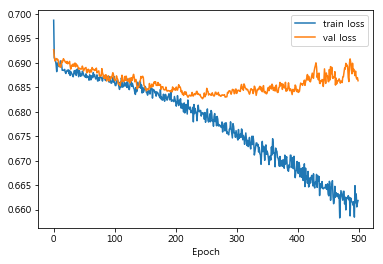

In [106]:
# loss: 0.0396 - mean_absolute_error: 0.1513 - val_loss: 0.0407 - val_mean_absolute_error: 0.1517
# loss: 0.0387 - mean_absolute_error: 0.1478 - val_loss: 0.0406 - val_mean_absolute_error: 0.1527

if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
# plt.title('Accuracy : Training vs Validation')
# plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

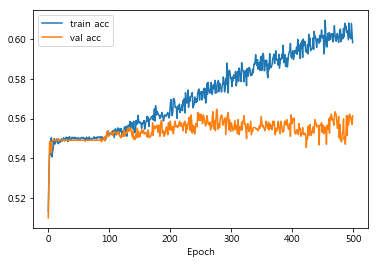

In [107]:
plt.plot(history['acc'], label='train acc')
plt.plot(history['val_acc'], label='val acc')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()